# This file is for the analysis of GDP versus Net Energy imports using Worldbank data 
# From the years (1990 -2014)

In [6]:
# Dependencies
import pandas as pd
from pathlib import Path
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas
import matplotlib.pyplot as plt



## Gather the data from the relevant csv files in the resources folder

In [8]:
# Get the gdp data

# Load the file
gdp_data = Path("Resources/cleaned_df.csv")

# Read in the data and store as a dataframe
gdp = pd.read_csv(gdp_data)

# Drop the series_id column and country_code
gdp.drop("series_id", axis=1, inplace=True)

# Rename value column
gdp = gdp.rename(columns={"value": "GDP (USD)"})

# Check the data
gdp.head(15)


,country_code,year,GDP (USD)
0,USA,2014,1.760000e+13
1,USA,2013,1.690000e+13
2,USA,2012,1.630000e+13
3,USA,2011,1.560000e+13
4,USA,2010,1.500000e+13
5,USA,2009,1.450000e+13
6,USA,2008,1.480000e+13
7,USA,2007,1.450000e+13
8,USA,2006,1.380000e+13
9,USA,2005,1.300000e+13


In [9]:
# Get the gdp data

# Load the file
imports_data = Path("Resources/imports.csv")

# Read in the data and store as a dataframe
imports = pd.read_csv(imports_data)

# Drop the series_id column and country_code
imports.drop(["series_id", "country_name"], axis=1, inplace=True)

# Rename value column
imports = imports.rename(columns={"value": "Net Energy Imports (%)"})

# Check the data
imports.head(15)

,country_code,year,Net Energy Imports (%)
0,USA,2015,7.308743
1,USA,2014,9.214466
2,USA,2013,13.943432
3,USA,2012,15.691729
4,USA,2011,18.554977
5,USA,2010,22.209201
6,USA,2009,22.124984
7,USA,2008,25.264071
8,USA,2007,28.585607
9,USA,2006,27.972123


In [10]:
# Merge the two data frames
complete_df = pd.merge(gdp, imports, how="left", on="country_code")

# Only take rows that have data for gdp and imports for the same year
complete_df = complete_df[complete_df["year_x"] == complete_df["year_y"]]

# Drop the second year column and rename
complete_df.drop("year_y", axis=1, inplace=True)
complete_df = complete_df.rename(columns={"year_x":"year"})
complete_df

,country_code,year,GDP (USD),Net Energy Imports (%)
1,USA,2014,1.760000e+13,9.214466
58,USA,2013,1.690000e+13,13.943432
115,USA,2012,1.630000e+13,15.691729
172,USA,2011,1.560000e+13,18.554977
229,USA,2010,1.500000e+13,22.209201
...,...,...,...,...
12366,CAN,1994,5.800000e+11,-47.835757
12423,CAN,1993,5.790000e+11,-42.892386
12480,CAN,1992,5.940000e+11,-37.540385
12537,CAN,1991,6.130000e+11,-36.560283


In [11]:
# Export the merged data into a csv
complete_df.to_csv("output_data/gdp_and_net_imports.csv", index_label="City_ID")

In [7]:
# Sort the data
richest = complete_df.sort_values("GDP (USD)", ascending=True)
richest

,country_code,year,GDP (USD),Net Energy Imports (%)
1790,RUS,1999,1.960000e+11,-57.982717
1764,RUS,2000,2.600000e+11,-57.926226
5860,IND,1991,2.700000e+11,8.797443
1816,RUS,1998,2.710000e+11,-59.834798
5770,IND,1993,2.790000e+11,11.984993
...,...,...,...,...
229,USA,2010,1.500000e+13,22.209201
172,USA,2011,1.560000e+13,18.554977
115,USA,2012,1.630000e+13,15.691729
58,USA,2013,1.690000e+13,13.943432


In [8]:
# Summary statistics by country

# GDP data
gdp_data = complete_df.set_index(["country_code"])["GDP (USD)"]
gdp_max = gdp_data.groupby(["country_code"]).max()
gdp_avg = gdp_data.groupby(["country_code"]).mean()
gdp_min = gdp_data.groupby(["country_code"]).min()

# Energy Imports data
imports_data = complete_df.set_index(["country_code"])["Net Energy Imports (%)"]
imports_max = imports_data.groupby(["country_code"]).max()
imports_avg = imports_data.groupby(["country_code"]).mean()
imports_min = imports_data.groupby(["country_code"]).min()

# Assemble the resulting series into a single summary DataFrame.
data ={
    "GDP Max": gdp_max,
    "GDP Min": gdp_min,
    "GDP Average": gdp_avg,
    "Imports Max": imports_max,
    "Imports Min": imports_min,
    "Imports Average": imports_avg
}

summary = pd.DataFrame(data)

summary

,GDP Max,GDP Min,GDP Average,Imports Max,Imports Min,Imports Average
country_code,,,,,,
CAN,1.850000e+12,5.790000e+11,1.044680e+12,-30.835755,-67.927222,-50.139132
CHN,1.050000e+13,3.610000e+11,3.000800e+12,15.021801,-4.565864,4.209099
DEU,3.890000e+12,1.770000e+12,2.712000e+12,62.093784,46.993620,58.304877
FRA,2.930000e+12,1.270000e+12,1.967600e+12,50.058987,43.485272,48.002854
GBR,3.090000e+12,1.060000e+12,2.009200e+12,42.323917,-26.806220,2.239528
IND,2.040000e+12,2.700000e+11,8.427600e+11,34.305524,8.259888,20.539694
ITA,2.410000e+12,1.060000e+12,1.623600e+12,84.423070,75.001304,81.626499
JPN,6.270000e+12,3.190000e+12,4.790800e+12,93.981260,78.428288,82.875856
RUS,2.290000e+12,1.960000e+11,8.792800e+11,-39.805183,-85.847244,-66.813401


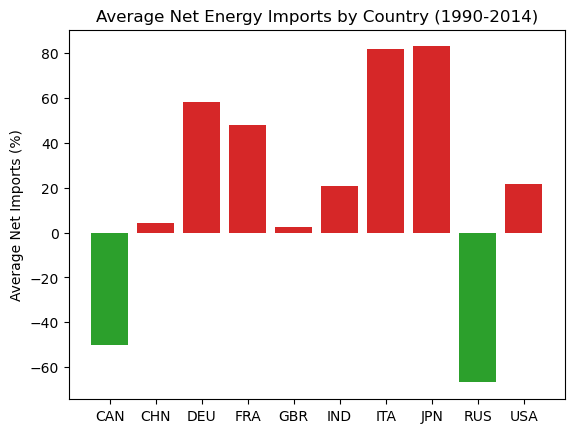

In [215]:
# Bar chart showing average energy by country over 25 year period

fig, ax = plt.subplots()

countries = ["CAN", "CHN", "DEU", "FRA", "GBR", "IND", "ITA", "JPN", "RUS", "USA"]
counts = summary["Imports Average"]
bar_colors = ["tab:green", "tab:red", "tab:red", "tab:red", "tab:red", "tab:red", "tab:red", "tab:red", "tab:green", "tab:red"]

ax.bar(countries, counts, color=bar_colors)

ax.set_ylabel('Average Net Imports (%)')
ax.set_title('Average Net Energy Imports by Country (1990-2014)')

# Save the figure
plt.savefig("output_data/Fig1.png")

plt.show()

**Analysis:** When looking at the average net energy imports accross a 25 year span for the current top 10 countries by GDP we can see that in general most of the countries import a percentage of their total energy. The two exporters being Canada and Russia are two known nations with large oil reserves so this coincides with our common sense. It appears that among the importers smaller nations (Germany, France, Italy, Japan) import on averge over half of their total energy. Japan being the largest importer again corroborates our preconcieved notions owing to it being a small island country with limited natural resources. The most surprising element of this graph is that great britian is nearly net nuetral on importing energy. I think this would warrant some further exploration

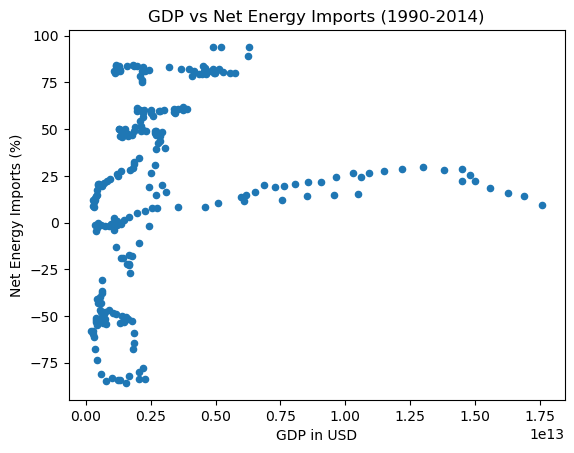

In [217]:
# Build scatter plot for gdp vs energy imports
scatter_1 = complete_df.plot(kind="scatter", y="Net Energy Imports (%)", x="GDP (USD)", title=("GDP vs Net Energy Imports (1990-2014)"))

# Incorporate the other graph properties
plt.xlabel("GDP in USD") 
plt.ylabel("Net Energy Imports (%)")
                           
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

**Analysis:** From the scatterplot above it appears that the highest gdp's generally have a net nuetral import percentage. Some potential bias to watch out for from this graph is that the USA was by and far the highest gdp country over this 25 year stretch so they may be skewing some of the data

## Now look at the highest importer and exporter to see if there is any correlation between the GDP and Net Imports

In [211]:
# Put country codes into a list for for loop (and later for plot labels)
# #country_codes = ["CAN", "RUS", "JPN", "ITA"]

# Create empty lists to fill with import data (for plotting)
canada_energy_imports = []
russia_energy_imports = []
japan_energy_imports = []
italy_energy_imports = []
us_energy_imports = []
china_energy_imports = []
germany_energy_imports = []
france_energy_imports = []
england_energy_imports = []
india_energy_imports = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


# add subsets

# Import info for canada
for index, row in complete_df.iterrows():
    if row["country_code"] == "CAN":
        canada_energy_imports.append(row["Net Energy Imports (%)"])

# import info for russia
for index, row in complete_df.iterrows():
    if row["country_code"] == "RUS":
        russia_energy_imports.append(row["Net Energy Imports (%)"])

# import info for Japan
for index, row in complete_df.iterrows():
    if row["country_code"] == "JPN":
        japan_energy_imports.append(row["Net Energy Imports (%)"])

# import info for italy
for index, row in complete_df.iterrows():
    if row["country_code"] == "ITA":
        italy_energy_imports.append(row["Net Energy Imports (%)"])

# import info for us
for index, row in complete_df.iterrows():
    if row["country_code"] == "USA":
        us_energy_imports.append(row["Net Energy Imports (%)"])

# import info for china
for index, row in complete_df.iterrows():
    if row["country_code"] == "CHN":
        china_energy_imports.append(row["Net Energy Imports (%)"])

# import info for germany
for index, row in complete_df.iterrows():
    if row["country_code"] == "DEU":
        germany_energy_imports.append(row["Net Energy Imports (%)"])

# import info for france
for index, row in complete_df.iterrows():
    if row["country_code"] == "FRA":
        france_energy_imports.append(row["Net Energy Imports (%)"])

# import info for england
for index, row in complete_df.iterrows():
    if row["country_code"] == "GBR":
        england_energy_imports.append(row["Net Energy Imports (%)"])

# import info for india
for index, row in complete_df.iterrows():
    if row["country_code"] == "IND":
        india_energy_imports.append(row["Net Energy Imports (%)"])


# Determine outliers using upper and lower bounds
# Turn all the lists into dataframes
imports_df = pd.DataFrame({"CAN" : canada_energy_imports,
                                          "RUS" : russia_energy_imports,
                                          "JPN" : japan_energy_imports,
                                          "ITA" : italy_energy_imports, 
                                          "USA" : us_energy_imports,
                                          "CHN" : china_energy_imports,
                                          "DEU" : germany_energy_imports,
                                          "FRA" : france_energy_imports,
                                          "GBR" : england_energy_imports, 
                                          "IND" : india_energy_imports})
imports_df

# Outliers for canada
# Finding quartiles
quartiles = imports_df["CAN"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
canada_outliers = []

for x in canada_energy_imports:
    if x < lower_bound or x > upper_bound:
        canada_outliers.append(x)

print(f"Canada's potential outliers: {canada_outliers}")

# Outliers for russia
# Finding quartiles
quartiles = imports_df["RUS"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
russia_outliers = []

for x in russia_energy_imports:
    if x < lower_bound or x > upper_bound:
        russia_outliers.append(x)

print(f"Russia's potential outliers: {russia_outliers}")

# Outliers for Japan
# Finding quartiles
quartiles = imports_df["JPN"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
japan_outliers = []

for x in japan_energy_imports:
    if x < lower_bound or x > upper_bound:
        japan_outliers.append(x)

print(f"Japan's potential outliers: {japan_outliers}")

# Outliers for italy
# Finding quartiles
quartiles = imports_df["ITA"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
italy_outliers = []

for x in italy_energy_imports:
    if x < lower_bound or x > upper_bound:
        italy_outliers.append(x)

print(f"Italy's potential outliers: {italy_outliers}")

# Outliers for us
# Finding quartiles
quartiles = imports_df["USA"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
us_outliers = []

for x in us_energy_imports:
    if x < lower_bound or x > upper_bound:
        us_outliers.append(x)

print(f"USA's potential outliers: {us_outliers}")

# Outliers for china
# Finding quartiles
quartiles = imports_df["CHN"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
china_outliers = []

for x in china_energy_imports:
    if x < lower_bound or x > upper_bound:
        china_outliers.append(x)

print(f"China's potential outliers: {china_outliers}")

# Outliers for germany
# Finding quartiles
quartiles = imports_df["DEU"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
germany_outliers = []

for x in germany_energy_imports:
    if x < lower_bound or x > upper_bound:
        germany_outliers.append(x)

print(f"Germany's potential outliers: {germany_outliers}")

# Outliers for france
# Finding quartiles
quartiles = imports_df["FRA"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
france_outliers = []

for x in france_energy_imports:
    if x < lower_bound or x > upper_bound:
        france_outliers.append(x)

print(f"France's potential outliers: {france_outliers}")

# Outliers for england
# Finding quartiles
quartiles = imports_df["GBR"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
england_outliers = []

for x in england_energy_imports:
    if x < lower_bound or x > upper_bound:
        england_outliers.append(x)

print(f"GBR's potential outliers: {england_outliers}")

# Outliers for india
# Finding quartiles
quartiles = imports_df["IND"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
india_outliers = []

for x in canada_energy_imports:
    if x < lower_bound or x > upper_bound:
        india_outliers.append(x)

print(f"India's potential outliers: {india_outliers}")

Canada's potential outliers: [-67.92722174303826, -64.44374805110212, -37.54038478251183, -36.56028250061904, -30.835755236887763]
Russia's potential outliers: []
Japan's potential outliers: [93.98125951657956, 93.91862662766074, 93.82704712482813, 88.93691414718518]
Italy's potential outliers: [75.00130370140964, 76.33877418500904]
USA's potential outliers: []
China's potential outliers: []
Germany's potential outliers: [54.572366308446426, 51.690833846010165, 51.117853655038125, 46.993619579061104]
France's potential outliers: []
GBR's potential outliers: []
India's potential outliers: [-67.92722174303826, -64.44374805110212, -59.11416040019076, -52.96207891631265, -51.37487379844099, -50.197715125769626, -50.42825604153691, -53.29171757634333, -53.80949229648226, -48.953644870421314, -48.23775636839017, -47.046452799054585, -54.12409412695918, -51.6681952783461, -47.804356415708845, -48.7356760905854, -53.53608280391168, -52.38390111820341, -51.2684199598067, -50.50588106804299, -47

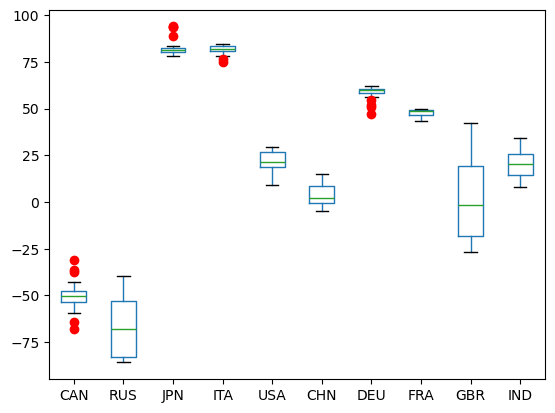

In [226]:
# Generate a box plot that shows the distribution of the energy imports for each country
boxplot = imports_df.boxplot(grid=False, sym = 'r')

# Save the figure
plt.savefig("output_data/Fig3.png")

**Analysis:** Here we see that the smaller countries (by land mass) have the narrowest range of import percentages over the 25 year stretch and the larger countries have higher spreads when it comes to their energy imports. There are several potential outliers that may warrant looking into, but given the narrow quartiles it is tough to speak to their statistical relevance without further inquiry. Once again GBR is the surprise here as it has the largest spread in it's quartiles. 